#0. 라이브러리

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

#1. 데이터 임포트

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%ls '/content/drive/My Drive/Colab Notebooks'

'데이터와 인공지능 창융특'/     'LSTM Synonym Selector.ipynb'
 과제연구/                       oranges-vs-grapefruit.zip
 졸업논문/                      'Part of speech.ipynb'
 8주차_1900김이름.ipynb          pima-indians-diabetes-database.zip
'car data.csv'                  'Real Code.ipynb'
 citrus.csv                      red-wine-quality-cortez-et-al-2009.zip
 diabetes.csv                    test1.ipynb
 insurance.csv                   tree.dot
 insurance.zip                   Untitled0.ipynb
 Keras/                          vehicle-dataset-from-cardekho.zip
'Keras 과제_2816 허원석.ipynb'   winequality-red.csv


In [6]:
%cd '/content/drive/My Drive/Colab Notebooks/졸업논문'

/content/drive/My Drive/Colab Notebooks/졸업논문


In [ ]:
!ls

'졸업논문 - 필체인식'   gul_cos.txt   gul_pad.txt   han_cos.txt   han_pad.txt


파일 입출력

In [7]:
han = open("han_pad.txt", "r") ##2187 data
gul = open("gul_pad.txt", "r") ##2187 data

#2. 데이터 가공

Input을 위한 빈 numpy array와 pandas DataFrame 생성

In [8]:
han_img = np.zeros(shape=(2187, 55, 55, 1))
gul_img = np.zeros(shape=(2187, 55, 55, 1))
han_index = pd.DataFrame(columns=['font'])
gul_index = pd.DataFrame(columns=['font'])

.txt file을 파싱하여 2187×55×55×1 image array와 font만을 저장한 index dataframe 생성

In [9]:
for i in range(2187):
  han_index.loc[i] = han.readline().strip()

  for j in range(55):
    arr = han.readline()
    each = arr.split()
    for k in range(55):
      han_img[i][j][k][0]=int(each[k])
  
  nullrow = han.readline()

for i in range(2187):
  gul_index.loc[i] = gul.readline().strip()

  for j in range(55):
    arr = gul.readline()
    each = arr.split()
    for k in range(55):
      gul_img[i][j][k][0]=int(each[k])
  
  nullrow = gul.readline()

각각의 index에 대한 cos값 대응

In [10]:
han_34 = {
    'B': 0.8798251538,
    'D': 1.0000000000,
    'G': 1.0000000000,
    'H1': 0.9563705323,
    'H2': 0.9949158086,
    'M': 0.9356743921,
    'N': 0.1784248055,
    'S': 0.9999871608,
    'Y': 0.7722728382
}
han_56 = {
    'B': 0.1109907259,
    'D': 0.000000000,
    'G': 0.0037707569,
    'H1': 0.0051702874,
    'H2': 0.7025923269,
    'M': 0.0975885376,
    'N': 0.0118393037,
    'S': 0.0282839639,
    'Y': 0.0539031838
}
han_78 = {
    'B': 0.3579882862,
    'D': 0.0080637295,
    'G': 0.0144208884,
    'H1': 0.2836063593,
    'H2': 0.0030305062,
    'M': 0.2700269792,
    'N': 0.0482988972,
    'S': 0.0000000000,
    'Y': 0.0044000504
}

In [11]:
gul_34 = {
    'B': 0.1855442322,
    'D': 0.1341097850,
    'G': 0.2085691021,
    'H1': 0.5645099800,
    'H2': 0.0357814546,
    'M': 0.1458398060,
    'N': 0.0327065629,
    'S': 0.0042034009,
    'Y': 0.1100420710
}
gul_56 = {
    'B': 0.6500443070,
    'D': 0.0559851938,
    'G': 0.0794400240,
    'H1': 0.0791933363,
    'H2': 0.2927475080,
    'M': 0.1268941339,
    'N': 0.0454391035,
    'S': 0.0000000000,
    'Y': 0.3000036753
}
gul_78 = {
    'B': 0.9873330275,
    'D': 0.0277456915,
    'G': 0.0000000000,
    'H1': 0.0972714983,
    'H2': 0.3023098252,
    'M': 0.4946422155,
    'N': 0.0000000000,
    'S': 0.0000000000,
    'Y': 0.0072718433
}

Output Vector, 6 types

In [12]:
hcos1 = pd.DataFrame(columns=['cos'])
hcos2 = pd.DataFrame(columns=['cos'])
hcos3 = pd.DataFrame(columns=['cos'])
gcos1 = pd.DataFrame(columns=['cos'])
gcos2 = pd.DataFrame(columns=['cos'])
gcos3 = pd.DataFrame(columns=['cos'])

for i in range(2187):
  hcos1.loc[i]=han_34[han_index['font'][i]]
  hcos2.loc[i]=han_56[han_index['font'][i]]
  hcos3.loc[i]=han_78[han_index['font'][i]]
  gcos1.loc[i]=gul_34[gul_index['font'][i]]
  gcos2.loc[i]=gul_56[gul_index['font'][i]]
  gcos3.loc[i]=gul_78[gul_index['font'][i]]

In [ ]:
type(hcos1['cos'][0])

numpy.float64

#3. 신경망 구축 및 훈련

In [13]:
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, Activation
from keras.optimizers import Adam

Using TensorFlow backend.


In [14]:
from sklearn.metrics import mean_squared_error

훈련 진척도 그래프

In [15]:
def modelplot(history, name, data, val_data):
  plt.plot(history.history[data])
  plt.plot(history.history[val_data])
  plt.title(name)
  plt.ylabel(data)
  plt.xlabel('epoch')
  plt.legend(['train', 'test'])
  plt.show()
  plt.savefig(name+'.png')

image -> cos이므로 데이터 이름은 i와 c로 고정

In [16]:
hi1_train, hi1_test, hc1_train, hc1_test = train_test_split(han_img, hcos1, test_size=0.2)
hi2_train, hi2_test, hc2_train, hc2_test = train_test_split(han_img, hcos2, test_size=0.2)
hi3_train, hi3_test, hc3_train, hc3_test = train_test_split(han_img, hcos3, test_size=0.2)
gi1_train, gi1_test, gc1_train, gc1_test = train_test_split(gul_img, gcos1, test_size=0.2)
gi2_train, gi2_test, gc2_train, gc2_test = train_test_split(gul_img, gcos2, test_size=0.2)
gi3_train, gi3_test, gc3_train, gc3_test = train_test_split(gul_img, gcos3, test_size=0.2)

SNN : Super Neural Network, 한 신경망을 6개의 CNN이 상속받아 사용(inherit SNN)

In [17]:
def inSNN():
  SNN = Sequential()

  SNN.add(Conv2D(32, (4, 4), input_shape=han_img.shape[1:], dtype='float32'))
  SNN.add(Activation(tf.nn.relu))
  SNN.add(Conv2D(64, (4, 4)))
  SNN.add(Activation(tf.nn.relu))
  SNN.add(MaxPooling2D(pool_size=(2, 2)))
  SNN.add(Dropout(0.1))

  SNN.add(Flatten())
  SNN.add(Dense(32))
  SNN.add(Dense(1))

  return SNN

In [18]:
H1=inSNN()
H1.compile(loss='MSE', optimizer='adam')
H1.summary()

hist1=H1.fit(hi1_train, hc1_train, validation_data=(hi1_test, hc1_test),
             epochs=500, batch_size=400, verbose=0)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 52, 52, 32)        544       
_________________________________________________________________
activation_1 (Activation)    (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 49, 49, 64)        32832     
_________________________________________________________________
activation_2 (Activation)    (None, 49, 49, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 36864)            

In [19]:
H2=inSNN()
H2.compile(loss='MSE', optimizer='adam')

hist2=H2.fit(hi2_train, hc2_train, validation_data=(hi2_test, hc2_test),
             epochs=500, batch_size=400, verbose=0)

In [20]:
H3=inSNN()
H3.compile(loss='MSE', optimizer='adam')

hist3=H3.fit(hi3_train, hc3_train, validation_data=(hi3_test, hc3_test),
             epochs=500, batch_size=400, verbose=0)

In [21]:
G1=inSNN()
G1.compile(loss='MSE', optimizer='adam')

hist4=G1.fit(gi1_train, gc1_train, validation_data=(gi1_test, gc1_test),
             epochs=500, batch_size=400, verbose=0)

In [22]:
G2=inSNN()
G2.compile(loss='MSE', optimizer='adam')

hist5=G2.fit(gi2_train, gc2_train, validation_data=(gi2_test, gc2_test),
             epochs=500, batch_size=400, verbose=0)

In [23]:
G3=inSNN()
G3.compile(loss='MSE', optimizer='adam')

hist6=G3.fit(gi3_train, gc3_train, validation_data=(gi3_test, gc3_test),
             epochs=500, batch_size=400, verbose=0)

In [ ]:
H1.compile(loss='MSE', optimizer='adam')
H2.compile(loss='MSE', optimizer='adam')
H3.compile(loss='MSE', optimizer='adam')
G1.compile(loss='MSE', optimizer='adam')
G2.compile(loss='MSE', optimizer='adam')
G3.compile(loss='MSE', optimizer='adam')

In [ ]:
H1.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 52, 52, 32)        544       
_________________________________________________________________
activation_17 (Activation)   (None, 52, 52, 32)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 49, 49, 64)        32832     
_________________________________________________________________
activation_18 (Activation)   (None, 49, 49, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 24, 24, 64)        0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 36864)           

In [ ]:
hist1=H1.fit(hi1_train, hc1_train, validation_data=(hi1_test, hc1_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 6.4256 - val_loss: 4.4797
Epoch 2/500
 - 0s - loss: 3.0360 - val_loss: 1.2226
Epoch 3/500
 - 0s - loss: 0.9658 - val_loss: 0.7670
Epoch 4/500
 - 0s - loss: 0.7301 - val_loss: 0.7050
Epoch 5/500
 - 0s - loss: 0.6855 - val_loss: 0.6708
Epoch 6/500
 - 0s - loss: 0.6501 - val_loss: 0.6296
Epoch 7/500
 - 0s - loss: 0.6050 - val_loss: 0.5734
Epoch 8/500
 - 0s - loss: 0.5410 - val_loss: 0.4886
Epoch 9/500
 - 0s - loss: 0.4405 - val_loss: 0.3437
Epoch 10/500
 - 0s - loss: 0.2560 - val_loss: 0.0754
Epoch 11/500
 - 0s - loss: 0.0898 - val_loss: 0.1115
Epoch 12/500
 - 0s - loss: 0.0794 - val_loss: 0.0543
Epoch 13/500
 - 0s - loss: 0.0639 - val_loss: 0.0629
Epoch 14/500
 - 0s - loss: 0.0581 - val_loss: 0.0428
Epoch 15/500
 - 0s - loss: 0.0455 - val_loss: 0.0416
Epoch 16/500
 - 0s - loss: 0.0420 - val_loss: 0.0338
Epoch 17/500
 - 0s - loss: 0.0335 - val_loss: 0.0312
Epoch 18/500
 - 0s - loss: 0.0294 - val_loss: 0.0262
Epoch 19

In [ ]:
hist2=H2.fit(hi2_train, hc2_train, validation_data=(hi2_test, hc2_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 0.2100 - val_loss: 0.0449
Epoch 2/500
 - 0s - loss: 0.0437 - val_loss: 0.0395
Epoch 3/500
 - 0s - loss: 0.0427 - val_loss: 0.0401
Epoch 4/500
 - 0s - loss: 0.0423 - val_loss: 0.0378
Epoch 5/500
 - 0s - loss: 0.0395 - val_loss: 0.0338
Epoch 6/500
 - 0s - loss: 0.0352 - val_loss: 0.0293
Epoch 7/500
 - 0s - loss: 0.0303 - val_loss: 0.0236
Epoch 8/500
 - 0s - loss: 0.0244 - val_loss: 0.0184
Epoch 9/500
 - 0s - loss: 0.0200 - val_loss: 0.0158
Epoch 10/500
 - 0s - loss: 0.0170 - val_loss: 0.0127
Epoch 11/500
 - 0s - loss: 0.0129 - val_loss: 0.0101
Epoch 12/500
 - 0s - loss: 0.0097 - val_loss: 0.0085
Epoch 13/500
 - 0s - loss: 0.0078 - val_loss: 0.0069
Epoch 14/500
 - 0s - loss: 0.0062 - val_loss: 0.0056
Epoch 15/500
 - 0s - loss: 0.0053 - val_loss: 0.0049
Epoch 16/500
 - 0s - loss: 0.0046 - val_loss: 0.0043
Epoch 17/500
 - 0s - loss: 0.0041 - val_loss: 0.0039
Epoch 18/500
 - 0s - loss: 0.0037 - val_loss: 0.0036
Epoch 19

In [ ]:
hist3=H3.fit(hi3_train, hc3_train, validation_data=(hi3_test, hc3_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 0.0469 - val_loss: 0.0132
Epoch 2/500
 - 0s - loss: 0.0112 - val_loss: 0.0064
Epoch 3/500
 - 0s - loss: 0.0053 - val_loss: 0.0031
Epoch 4/500
 - 0s - loss: 0.0028 - val_loss: 0.0022
Epoch 5/500
 - 0s - loss: 0.0020 - val_loss: 0.0012
Epoch 6/500
 - 0s - loss: 0.0012 - val_loss: 9.8504e-04
Epoch 7/500
 - 0s - loss: 9.4151e-04 - val_loss: 7.7517e-04
Epoch 8/500
 - 0s - loss: 7.5367e-04 - val_loss: 6.4383e-04
Epoch 9/500
 - 0s - loss: 6.9495e-04 - val_loss: 5.9990e-04
Epoch 10/500
 - 0s - loss: 5.6558e-04 - val_loss: 5.4758e-04
Epoch 11/500
 - 0s - loss: 5.0458e-04 - val_loss: 4.7817e-04
Epoch 12/500
 - 0s - loss: 4.4667e-04 - val_loss: 4.3395e-04
Epoch 13/500
 - 0s - loss: 4.1216e-04 - val_loss: 4.1458e-04
Epoch 14/500
 - 0s - loss: 3.9422e-04 - val_loss: 3.9619e-04
Epoch 15/500
 - 0s - loss: 3.6237e-04 - val_loss: 3.7779e-04
Epoch 16/500
 - 0s - loss: 3.3911e-04 - val_loss: 3.6400e-04
Epoch 17/500
 - 0s - loss: 3.5

In [ ]:
hist4=G1.fit(gi1_train, gc1_train, validation_data=(gi1_test, gc1_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 0.0184 - val_loss: 0.0061
Epoch 2/500
 - 0s - loss: 0.0067 - val_loss: 0.0036
Epoch 3/500
 - 0s - loss: 0.0037 - val_loss: 0.0018
Epoch 4/500
 - 0s - loss: 0.0023 - val_loss: 0.0014
Epoch 5/500
 - 0s - loss: 0.0018 - val_loss: 0.0013
Epoch 6/500
 - 0s - loss: 0.0013 - val_loss: 0.0012
Epoch 7/500
 - 0s - loss: 0.0010 - val_loss: 0.0012
Epoch 8/500
 - 0s - loss: 9.0016e-04 - val_loss: 7.9977e-04
Epoch 9/500
 - 0s - loss: 7.9289e-04 - val_loss: 7.2226e-04
Epoch 10/500
 - 0s - loss: 6.7336e-04 - val_loss: 6.2858e-04
Epoch 11/500
 - 0s - loss: 5.8472e-04 - val_loss: 5.8521e-04
Epoch 12/500
 - 0s - loss: 5.3424e-04 - val_loss: 6.6629e-04
Epoch 13/500
 - 0s - loss: 5.0921e-04 - val_loss: 5.4808e-04
Epoch 14/500
 - 0s - loss: 4.5197e-04 - val_loss: 5.4391e-04
Epoch 15/500
 - 0s - loss: 4.2255e-04 - val_loss: 5.1253e-04
Epoch 16/500
 - 0s - loss: 3.9345e-04 - val_loss: 5.0020e-04
Epoch 17/500
 - 0s - loss: 3.8174e-04 - va

In [ ]:
hist5=G2.fit(gi2_train, gc2_train, validation_data=(gi2_test, gc2_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 0.0438 - val_loss: 0.0288
Epoch 2/500
 - 0s - loss: 0.0186 - val_loss: 0.0089
Epoch 3/500
 - 0s - loss: 0.0069 - val_loss: 0.0039
Epoch 4/500
 - 0s - loss: 0.0035 - val_loss: 0.0026
Epoch 5/500
 - 0s - loss: 0.0026 - val_loss: 0.0029
Epoch 6/500
 - 0s - loss: 0.0022 - val_loss: 0.0020
Epoch 7/500
 - 0s - loss: 0.0017 - val_loss: 0.0018
Epoch 8/500
 - 0s - loss: 0.0013 - val_loss: 0.0013
Epoch 9/500
 - 0s - loss: 0.0012 - val_loss: 0.0012
Epoch 10/500
 - 0s - loss: 0.0011 - val_loss: 0.0014
Epoch 11/500
 - 0s - loss: 9.9742e-04 - val_loss: 0.0012
Epoch 12/500
 - 0s - loss: 8.6086e-04 - val_loss: 0.0011
Epoch 13/500
 - 0s - loss: 7.2874e-04 - val_loss: 9.3713e-04
Epoch 14/500
 - 0s - loss: 6.7987e-04 - val_loss: 9.8071e-04
Epoch 15/500
 - 0s - loss: 6.6283e-04 - val_loss: 8.8285e-04
Epoch 16/500
 - 0s - loss: 6.2672e-04 - val_loss: 9.1513e-04
Epoch 17/500
 - 0s - loss: 6.2941e-04 - val_loss: 8.3922e-04
Epoch 18/500


In [ ]:
hist6=G3.fit(gi3_train, gc3_train, validation_data=(gi3_test, gc3_test),
             epochs=500, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/500
 - 0s - loss: 0.0259 - val_loss: 0.0090
Epoch 2/500
 - 0s - loss: 0.0170 - val_loss: 0.0123
Epoch 3/500
 - 0s - loss: 0.0082 - val_loss: 0.0062
Epoch 4/500
 - 0s - loss: 0.0055 - val_loss: 0.0037
Epoch 5/500
 - 0s - loss: 0.0037 - val_loss: 0.0028
Epoch 6/500
 - 0s - loss: 0.0026 - val_loss: 0.0024
Epoch 7/500
 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 8/500
 - 0s - loss: 0.0019 - val_loss: 0.0018
Epoch 9/500
 - 0s - loss: 0.0016 - val_loss: 0.0020
Epoch 10/500
 - 0s - loss: 0.0013 - val_loss: 0.0017
Epoch 11/500
 - 0s - loss: 0.0011 - val_loss: 0.0016
Epoch 12/500
 - 0s - loss: 9.7187e-04 - val_loss: 0.0015
Epoch 13/500
 - 0s - loss: 9.1829e-04 - val_loss: 0.0014
Epoch 14/500
 - 0s - loss: 8.3290e-04 - val_loss: 0.0013
Epoch 15/500
 - 0s - loss: 8.5541e-04 - val_loss: 0.0012
Epoch 16/500
 - 0s - loss: 7.6224e-04 - val_loss: 0.0013
Epoch 17/500
 - 0s - loss: 7.5040e-04 - val_loss: 0.0013
Epoch 18/500
 - 0s - loss: 6.4669e-04

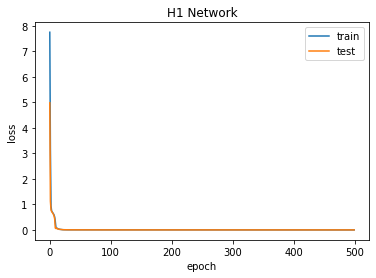

<Figure size 432x288 with 0 Axes>

In [24]:
modelplot(hist1, "H1 Network", 'loss', 'val_loss')

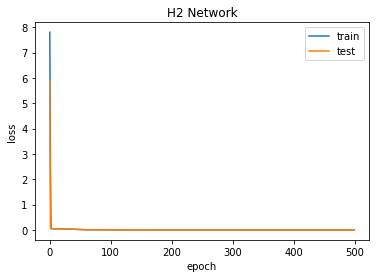

<Figure size 432x288 with 0 Axes>

In [25]:
modelplot(hist2, "H2 Network", 'loss', 'val_loss')

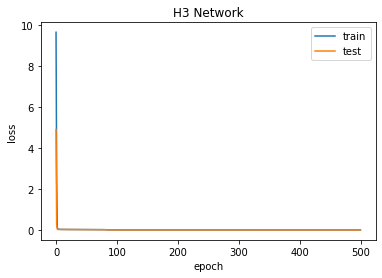

<Figure size 432x288 with 0 Axes>

In [26]:
modelplot(hist3, "H3 Network", 'loss', 'val_loss')

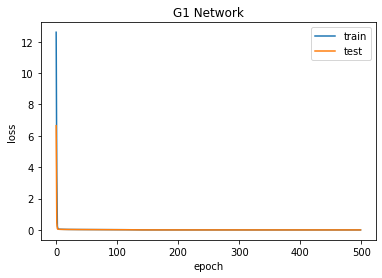

<Figure size 432x288 with 0 Axes>

In [27]:
modelplot(hist4, "G1 Network", 'loss', 'val_loss')

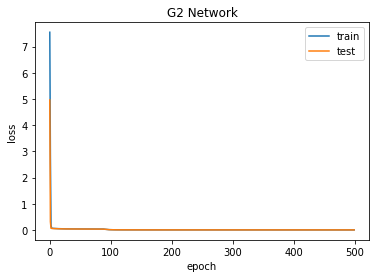

<Figure size 432x288 with 0 Axes>

In [28]:
modelplot(hist5, "G2 Network", 'loss', 'val_loss')

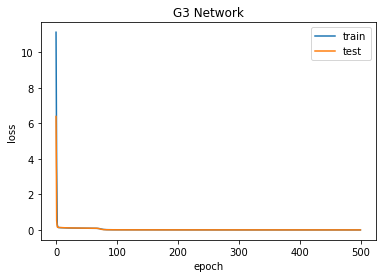

<Figure size 432x288 with 0 Axes>

In [29]:
modelplot(hist6, "G3 Network", 'loss', 'val_loss')

In [30]:
H1_pred=H1.predict(han_img)
H2_pred=H2.predict(han_img)
H3_pred=H3.predict(han_img)
G1_pred=G1.predict(gul_img)
G2_pred=G2.predict(gul_img)
G3_pred=G3.predict(gul_img)

In [31]:
print(mean_squared_error(H1_pred, hcos1))
print(mean_squared_error(H2_pred, hcos2))
print(mean_squared_error(H3_pred, hcos3))
print(mean_squared_error(G1_pred, gcos1))
print(mean_squared_error(G2_pred, gcos2))
print(mean_squared_error(G3_pred, gcos3))

0.00046370456327560964
0.0002749371706430116
0.00012345726977519014
0.0005875893609226475
0.000526183610122435
0.0006970431972859507


In [32]:
index_ohe = pd.get_dummies(han_index, columns=['font'])
index_ohe.head()

,font_B,font_D,font_G,font_H1,font_H2,font_M,font_N,font_S,font_Y
0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0


In [33]:
cos_val = np.zeros(shape=(2187, 6))

for i in range(2187):
  cos_val[i][0]=H1_pred[i]
  cos_val[i][1]=H2_pred[i]
  cos_val[i][2]=H3_pred[i]
  cos_val[i][3]=G1_pred[i]
  cos_val[i][4]=G2_pred[i]
  cos_val[i][5]=G3_pred[i]

In [34]:
cos_train, cos_test, index_train, index_test = train_test_split(cos_val, index_ohe, test_size=0.2)

In [35]:
CATNN = Sequential()
CATNN.add(Dense(72, input_shape=cos_val.shape[1:], activation='relu'))
CATNN.add(Dense(36, activation='relu'))
CATNN.add(Dense(18, activation='relu'))
CATNN.add(Dense(9, activation='sigmoid'))

CATNN.compile(loss='categorical_crossentropy', optimizer='adam')
CATNN.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 72)                504       
_________________________________________________________________
dense_14 (Dense)             (None, 36)                2628      
_________________________________________________________________
dense_15 (Dense)             (None, 18)                666       
_________________________________________________________________
dense_16 (Dense)             (None, 9)                 171       
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [36]:
Fhist = CATNN.fit(cos_train, index_train, validation_data=(cos_test, index_test),
                  epochs=512, batch_size=400, verbose=2)

Train on 1749 samples, validate on 438 samples
Epoch 1/512
 - 0s - loss: 2.1992 - val_loss: 2.1919
Epoch 2/512
 - 0s - loss: 2.1911 - val_loss: 2.1859
Epoch 3/512
 - 0s - loss: 2.1862 - val_loss: 2.1809
Epoch 4/512
 - 0s - loss: 2.1813 - val_loss: 2.1755
Epoch 5/512
 - 0s - loss: 2.1760 - val_loss: 2.1691
Epoch 6/512
 - 0s - loss: 2.1698 - val_loss: 2.1614
Epoch 7/512
 - 0s - loss: 2.1624 - val_loss: 2.1499
Epoch 8/512
 - 0s - loss: 2.1512 - val_loss: 2.1321
Epoch 9/512
 - 0s - loss: 2.1355 - val_loss: 2.1111
Epoch 10/512
 - 0s - loss: 2.1182 - val_loss: 2.0877
Epoch 11/512
 - 0s - loss: 2.0973 - val_loss: 2.0597
Epoch 12/512
 - 0s - loss: 2.0716 - val_loss: 2.0279
Epoch 13/512
 - 0s - loss: 2.0423 - val_loss: 1.9918
Epoch 14/512
 - 0s - loss: 2.0094 - val_loss: 1.9520
Epoch 15/512
 - 0s - loss: 1.9734 - val_loss: 1.9086
Epoch 16/512
 - 0s - loss: 1.9337 - val_loss: 1.8628
Epoch 17/512
 - 0s - loss: 1.8911 - val_loss: 1.8153
Epoch 18/512
 - 0s - loss: 1.8463 - val_loss: 1.7670
Epoch 19

In [37]:
index_pred = CATNN.predict(cos_val)

for i in range(len(index_pred)):
  M=0
  for j in range(9):
    if index_pred[i][j]>index_pred[i][M]:
      M=j
  
  for j in range(9):
    if M != j:
      index_pred[i][j]=0
    else:
      index_pred[i][j]=1

In [38]:
cnt = 0
for i in range(len(index_pred)):
  pred = 0
  actual = 0
  for j in range(len(index_pred[0])):
    if index_pred[i][j]==1:
      pred=j
    if index_ohe.iloc[i, j]==1:
      actual=j

  if pred == actual:
    cnt = cnt+1

print(cnt*100/len(index_pred))

99.26840420667581


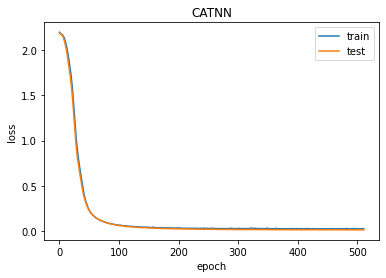

<Figure size 432x288 with 0 Axes>

In [39]:
modelplot(Fhist, "CATNN", "loss", "val_loss")